In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取CSV数据

In [3]:
data1 = pd.read_csv('data1.csv',header=None)
data1.columns = ['X1', 'X2', 'Labels']

# 整理数据

In [4]:
X = np.hstack((np.array(data1['X1']).reshape(-1,1),np.array(data1['X2']).reshape(-1,1)))
X = np.hstack((np.ones([X.shape[0],1]),X))
Y = np.array(data1['Labels']).reshape(-1,1)
#print(X,Y)

# 初始化权重

In [5]:
W = np.zeros([3,1])
#print(W)

# 算法学习

In [6]:
def linearly_separable(X,Y,W,iter_num=1000):
    
    for i in range(iter_num):
        flag = False
        for j in range(X.shape[0]):
            pred = np.sign(np.dot(X[j:j+1,:],W))
            #print(pred,Y[j])
            if (pred != Y[j]):
                if (flag == False):
                    flag = True
                W += Y[j]*X[j:j+1,:].reshape(3,1)
                #print(W)
        if flag == False:
            print('All classified True')
            break            
    return W
            

In [7]:
W = linearly_separable(X,Y,W)
#print(W)

All classified True


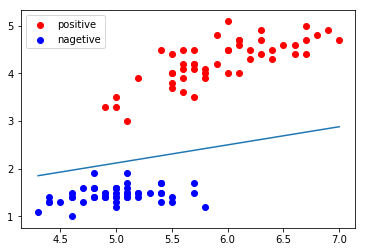

In [8]:
x1min = np.amin(data1['X1'])
x1max = np.amax(data1['X1'])
#画图
x1 = np.array([x1min, x1max])
x2 = -(x1 * W[1,0] + W[0,0]) / W[2,0]
plt.figure
plt.scatter(data1['X1'][0:50],data1['X2'][0:50],c='red')
plt.scatter(data1['X1'][50:],data1['X2'][50:],c='blue')
plt.legend(['positive','nagetive'])

plt.plot(x1, x2)
plt.show()